<a href="https://colab.research.google.com/github/StasKonkin/ML-labs-from-the-Uni-course/blob/main/Lab1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

In [ ]:
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1.013160e+09,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675.0,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0.0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180.0,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924.0,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1.021380e+09,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975.0,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,NaN,Not Available,0.0,0.0,0.0,231342,Not Available,Not Available,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1.021390e+09,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161.0,FT WASHINGTON AVENUE,Manhattan,891040.0,H

In [ ]:
df.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                               float64
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                 float64
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

In [ ]:
df = df.replace(r'^.*(Not).*$', np.NaN, regex=True)

In [ ]:
for column in df:
    try:
        df[column] = df[column].astype(float)
    except:
        pass
df.dtypes

Order                                                         float64
Property Id                                                   float64
Property Name                                                  object
Parent Property Id                                            float64
Parent Property Name                                           object
BBL - 10 digits                                               float64
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                 float64
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

In [ ]:
df = df.loc[:,(df.isna().sum() / len(df.index) * 100) < 50]
df.shape

(11746, 47)

In [ ]:
df_float = df.select_dtypes(include=['float64'])
q3 = df_float.quantile(0.75)
q1 = df_float.quantile(0.25)
iq = q3 - q1
lower = q1 - 3*iq
upper = q3 + 3*iq

In [ ]:
df = df[~(((df_float > upper) | (df_float < lower)).sum(axis=1) > 0)]
df.shape

(7526, 47)

In [ ]:
df["Borough"].value_counts()

Manhattan        3273
Queens           1542
Brooklyn         1514
Bronx            1095
Staten Island      68
Name: Borough, dtype: int64

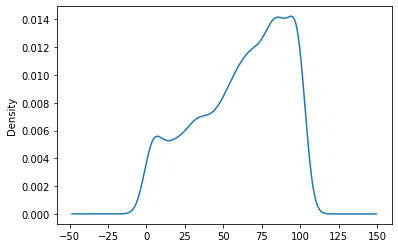

In [ ]:
df["ENERGY STAR Score"].plot.kde()
plt.show()

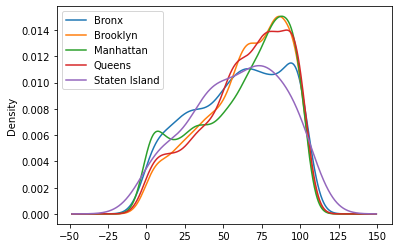

In [ ]:
fig, ax = plt.subplots(ncols=1)
df[["ENERGY STAR Score", "Borough"]].groupby("Borough")["ENERGY STAR Score"].plot(kind='kde', ax=ax, legend=True)
plt.show()

In [ ]:
df["Primary Property Type - Self Selected"].value_counts()

Multifamily Housing                                 5914
Office                                               632
Non-Refrigerated Warehouse                           140
Other                                                126
Hotel                                                 95
Residence Hall/Dormitory                              82
College/University                                    69
Self-Storage Facility                                 68
Senior Care Community                                 58
Distribution Center                                   55
K-12 School                                           54
Retail Store                                          44
Manufacturing/Industrial Plant                        34
Mixed Use Property                                    32
Parking                                               20
Medical Office                                        14
Worship Facility                                      12
Hospital (General Medical & Sur

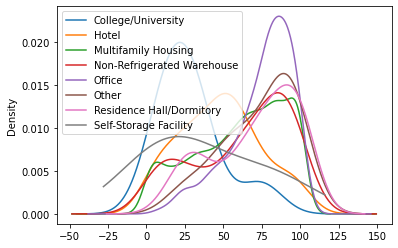

In [ ]:
fig, ax = plt.subplots(ncols=1)
df[["ENERGY STAR Score", "Primary Property Type - Self Selected"]]\
    .groupby("Primary Property Type - Self Selected")\
    .filter(lambda x: len(x) > 60)\
    .groupby("Primary Property Type - Self Selected")["ENERGY STAR Score"]\
    .plot(kind='kde', ax=ax, legend=True)
plt.show()

In [ ]:
df_float = df.select_dtypes(include=['float64'])
df_float.corrwith(df_float["ENERGY STAR Score"]).sort_values()

Weather Normalized Source EUI (kBtu/ft²)                     -0.724161
Site EUI (kBtu/ft²)                                          -0.720070
Source EUI (kBtu/ft²)                                        -0.719223
Weather Normalized Site EUI (kBtu/ft²)                       -0.706133
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.427880
Total GHG Emissions (Metric Tons CO2e)                       -0.369659
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.330050
Direct GHG Emissions (Metric Tons CO2e)                      -0.312627
Natural Gas Use (kBtu)                                       -0.247291
Indirect GHG Emissions (Metric Tons CO2e)                    -0.240696
Electricity Use - Grid Purchase (kBtu)                       -0.240650
Weather Normalized Site Electricity (kWh)                    -0.239127
Weather Normalized Site Natural Gas Use (therms)             -0.236847
Water Intensity (All Water Sources) (gal/ft²)                -0.233183
Water 

In [ ]:
one_hot = pd.get_dummies(df['Borough'])
df = df.join(one_hot)
one_hot = pd.get_dummies(df['Primary Property Type - Self Selected'])
df = df.join(one_hot)

In [ ]:
columns = ["DOF Gross Floor Area", 
           "Largest Property Use Type - Gross Floor Area (ft²)", 
           "Site EUI (kBtu/ft²)", 
           "Weather Normalized Site EUI (kBtu/ft²)",
           "Weather Normalized Source EUI (kBtu/ft²)", 
           "Natural Gas Use (kBtu)", 
           "Weather Normalized Site Natural Gas Use (therms)", 
           "Electricity Use - Grid Purchase (kBtu)", 
           "Weather Normalized Site Electricity (kWh)", 
           "Total GHG Emissions (Metric Tons CO2e)", 
           "Indirect GHG Emissions (Metric Tons CO2e)", 
           "Property GFA - Self-Reported (ft²)", 
           "Water Use (All Water Sources) (kgal)", 
           "Water Intensity (All Water Sources) (gal/ft²)", 
           "Source EUI (kBtu/ft²)"]
df[columns] = np.log(df[columns] + 1)
df.shape

(7526, 91)

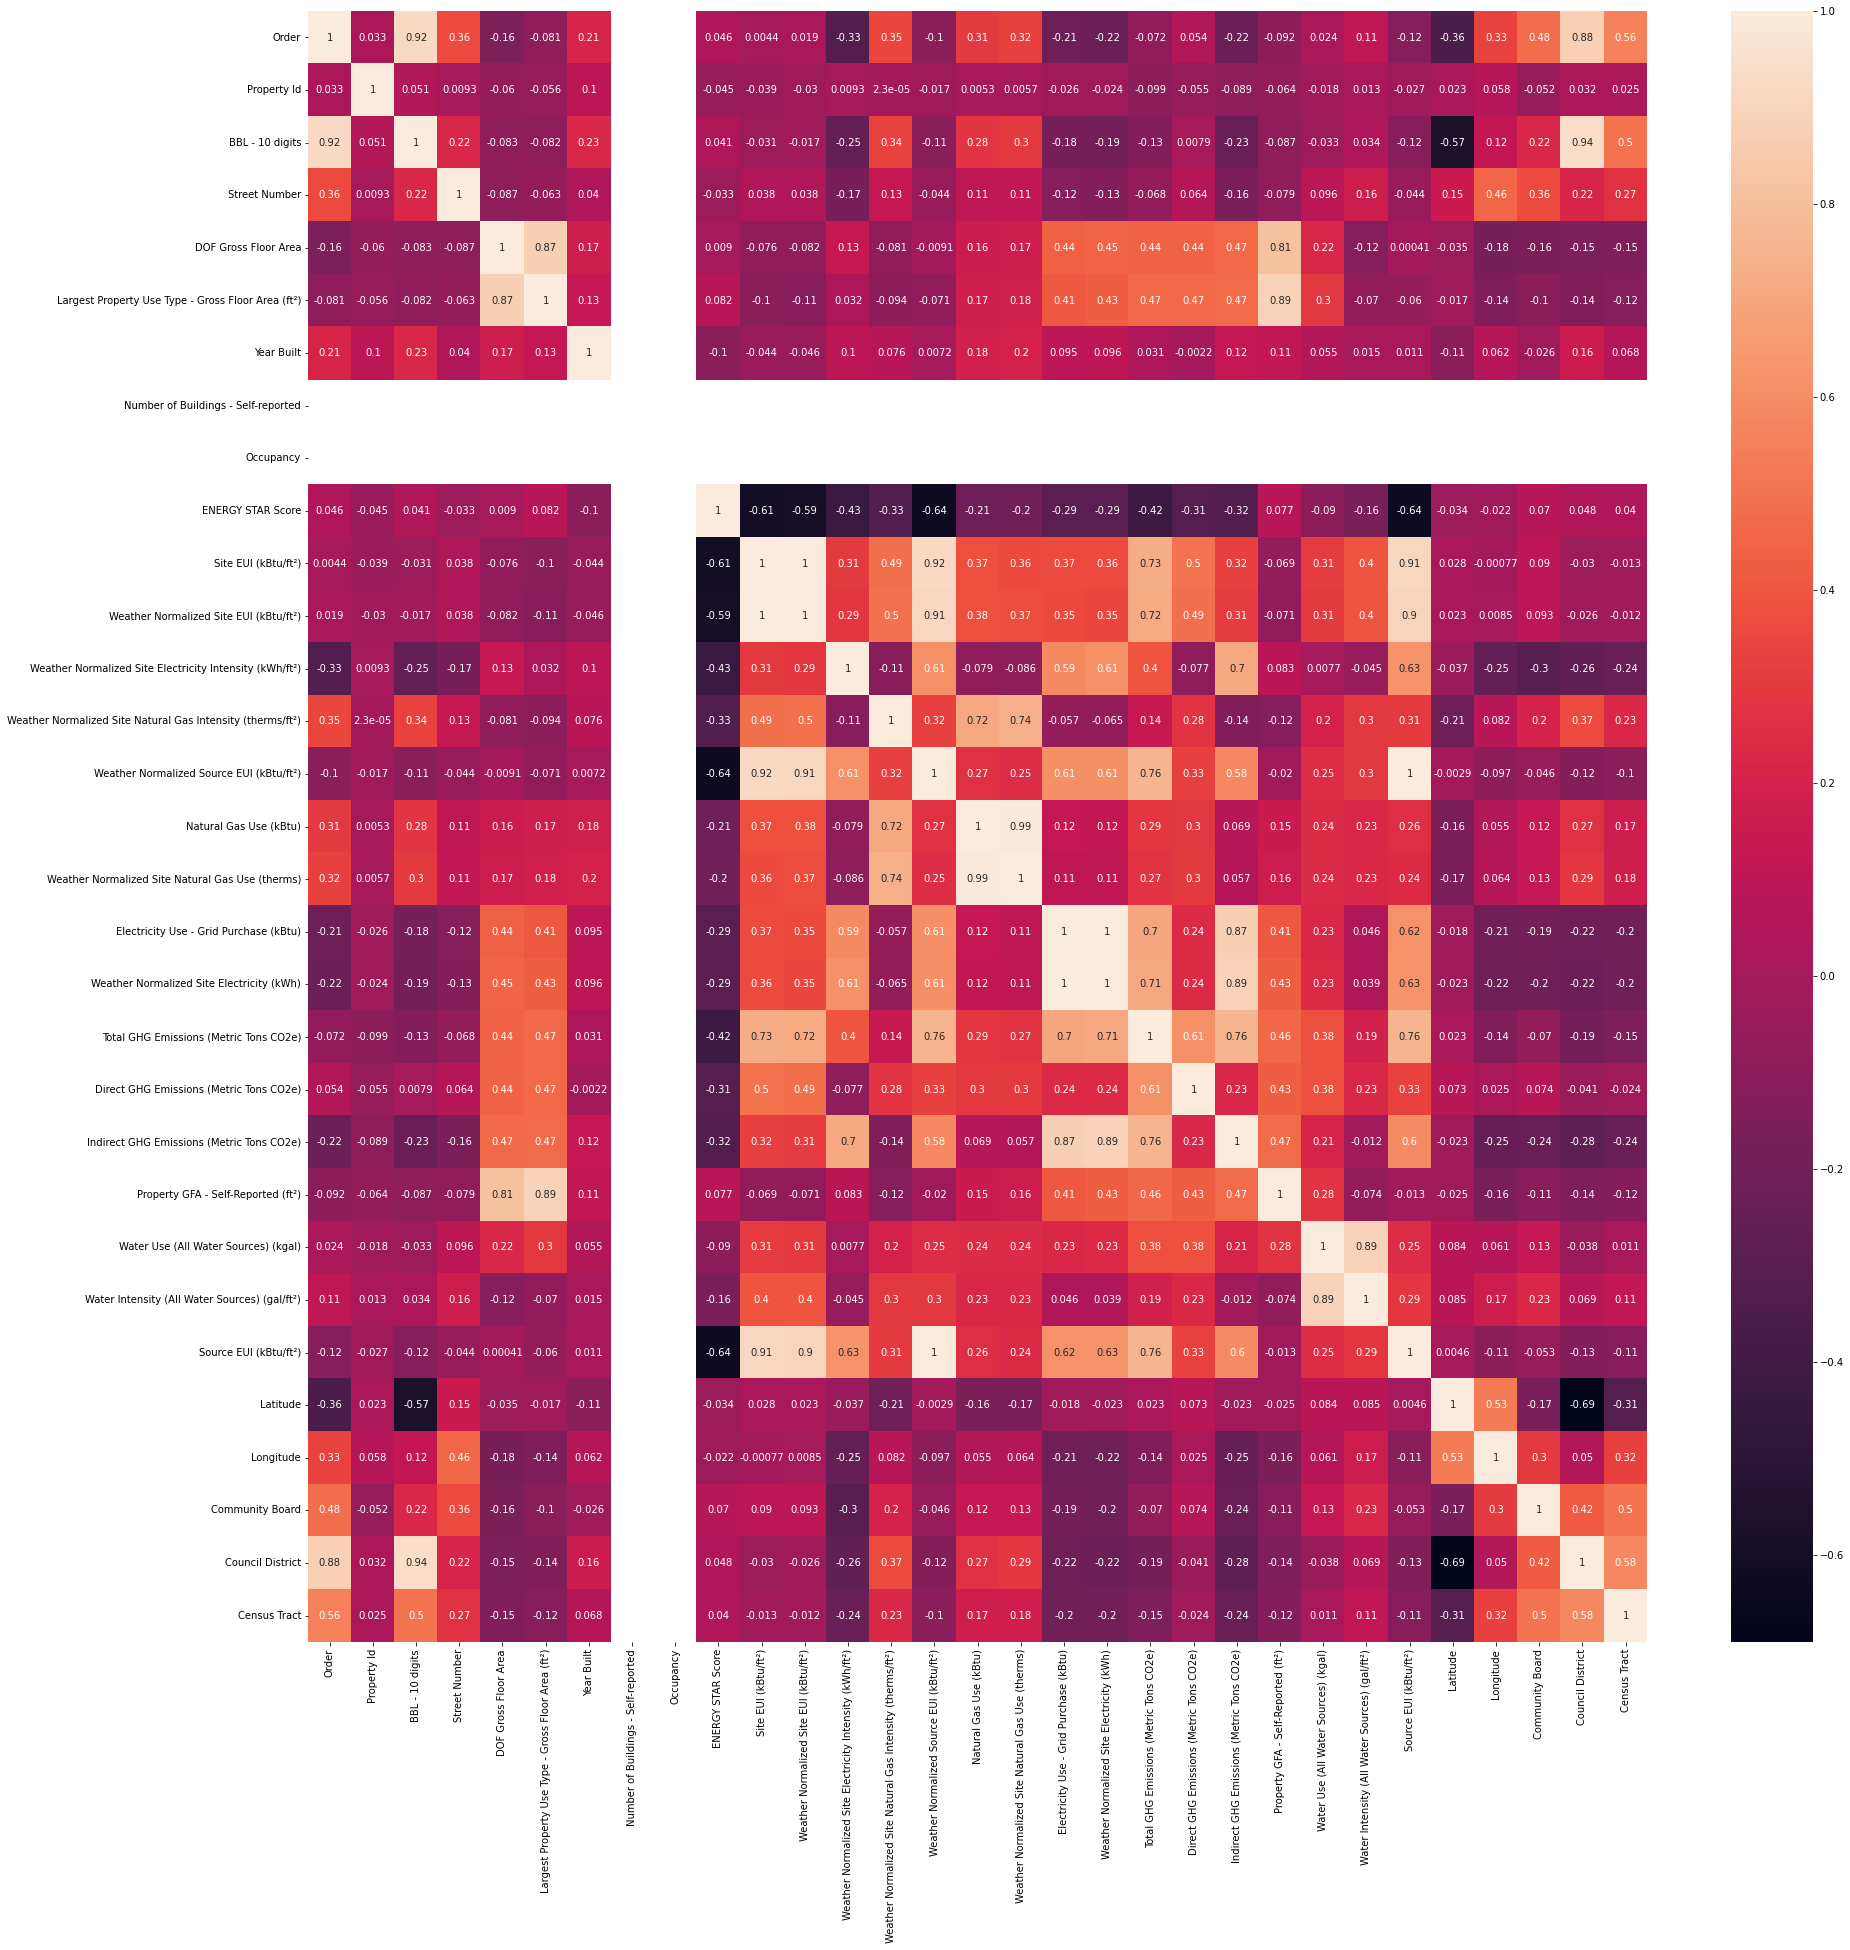

In [ ]:
plt.figure(figsize=(30, 30))
ax = sns.heatmap(df.select_dtypes(include=['float64']).corr(), annot=True)
plt.show()

In [ ]:
df.drop(columns=["DOF Gross Floor Area", "Order", "Council District", "Weather Normalized Source EUI (kBtu/ft²)", "Weather Normalized Site Natural Gas Use (therms)"])

,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Census Tract,NTA,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Adult Education,Automobile Dealership,College/University,Distribution Center,Financial Office,Hospital (General Medical & Surgical),Hotel,K-12 School,Library,Manufacturing/Industrial Plant,Medical Office,Mixed Use Property,Movie Theater,Multifamily Housing,Museum,Non-Refrigerated Warehouse,Office,Other,Other - Education,Other - Entertainment/Public Assembly,Other - Lodging/Residential,Other - Mall,Other - Services,Other - Specialty Hospital,Outpatient Rehabilitation/Physical Therapy,Parking,Performing Arts,Refrigerated Warehouse,"Repair Services (Vehicle, Shoe, Locksmith, etc.)",Residence Hall/Dormitory,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Social/Meeting Hall,Strip Mall,Supermarket/Grocery Store,Urgent Care/Clinic/Other Outpatient,Worship Facility
2,4778226.0,MSCHoNY North,1.021380e+09,1-02138-0030,1063380,3975 Broadway,10032,3975.0,BROADWAY,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),12.351657,1924.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,12.351657,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,251.0,Washington Heights South ...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4778288.0,Neuro Institute,1.021390e+09,1-02139-0085,1063403,710 West 168th Street,10032,193.0,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),12.099016,1932.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,12.099016,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,255.0,Washington Heights South ...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,4045810.0,242 Mason Ave,5.033550e+09,5-03355-0065,5104756,475 Seaview Av,10305,242.0,MASON AVENUE,Staten Island,Medical Office,Medical Office,Medical Office,10.983494,1950.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,0.000000,10.983494,NaN,NaN,NaN,04/25/2017 12:11:30 PM,NaN,In Compliance,40.586868,-74.086592,2.0,70.0,Old Town-Dongan Hills-South Beach ...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,4988574.0,- 720 Ft. Washington Ave. bldg,1.021801e+09,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720.0,FT WASHINGTON AVENUE,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,12.229403,1939.0,1.0,100.0,Whole Building,NaN,67.0,4.339902,4.382027,4.0,0.0,13.223909,14.875678,13.617081,7.094567,936.5,5.594340,12.229403,NaN,NaN,4.678421,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,281.0,Washington Heights North ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0